In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import ascii as astro_ascii
import pickle, scipy, copy, numpy as np, pandas as pd

from alf_vars import *
from linterp import *
from scipy import constants
from velbroad import *
from set_pinit_priors import *
from setup import *
from vacairconv import *
from read_data import *
from getm2l import getm2l
from getmass import getmass
from getmodel import getmodel
from contnormspec import contnormspec
from getvelz import getvelz
from str2arr import str2arr
from spec_from_sum import spec_from_sum
from write_a_model import *
from func import *

In [2]:
alfvar = pickle.load(open('alfvar_sspgrid_irldss3_imftype3.p', "rb" ))

In [3]:
pos, alfvar, mspec = spec_from_sum('ldss3_dr246_n4055_Re4_wave6e_imf3hernoatm', 
                                   alfvar, 
                                   getsum = 'mean', 
                                   returnspec=True)

m2l= [6.29104118 4.32483396 0.        ]


In [ ]:
pos.feh

In [83]:
ckms = 2.99792e5
sigma_to_fwhm = 2.3548
for sigma in [50, 100, 150, 200]:
    fwhm = sigma * sigma_to_fwhm
    Rsigma = ckms / sigma
    R = ckms / fwhm
    print('sigma= %.1f, fwhm=%.1f, Rsigma=%.1f, R=%.1f' %(sigma, fwhm, Rsigma, R))    
print('\n')
for R in [1000, 2000, 3000, 4000]:
    fwhm = ckms/R
    sigma = fwhm / sigma_to_fwhm
    Rsigma = ckms/sigma
    print('sigma= %.1f, fwhm=%.1f, Rsigma=%.1f, R=%.1f' %(sigma, fwhm, Rsigma, R))       

sigma= 50.0, fwhm=117.7, Rsigma=5995.8, R=2546.2
sigma= 100.0, fwhm=235.5, Rsigma=2997.9, R=1273.1
sigma= 150.0, fwhm=353.2, Rsigma=1998.6, R=848.7
sigma= 200.0, fwhm=471.0, Rsigma=1499.0, R=636.6


sigma= 127.3, fwhm=299.8, Rsigma=2354.8, R=1000.0
sigma= 63.7, fwhm=149.9, Rsigma=4709.6, R=2000.0
sigma= 42.4, fwhm=99.9, Rsigma=7064.4, R=3000.0
sigma= 31.8, fwhm=74.9, Rsigma=9419.2, R=4000.0


In [155]:
l1 = [3.3812370, 4.8148427, 4.6216226, 4.1517949,  4.5906448]
l2 = [0.00020186846, 3.9988503e-05, 6.6789602e-05, 0.00011237358, 6.1528292e-05]

l1b = [2.4110827, 2.3014438, 2.4075849, 2.5498726]
l2b = [0.00011929292, 0.00015123824, 0.00012054991, 0.00010536649]

print(np.mean(l1), np.mean(l2))
print(np.mean(l1b), np.mean(l2b))

4.3120284 9.65096874e-05
2.417496 0.00012411189


In [157]:
for i in range(2):
    print(i)

0
1


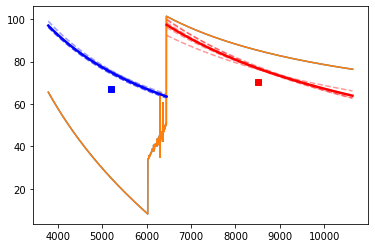

In [165]:
ckms = 2.99792e5
sigma_to_fwhm = 2.3548
lightspeed = 299792.458
#; Read in polynomial order and coefficients fitting instrumental resolution
bluecoeffs = [1, 2.417496, 0.00012411189]
redcoeffs = [1, 4.3120284, 9.65096874e-05]
logLamblue = alfvar.data.lam

wavecut = 6450
wavered = logLamblue[logLamblue>wavecut]
waveblue = logLamblue[logLamblue<=wavecut]
blueresl = np.zeros_like(waveblue)
redresl = np.zeros_like(wavered)


for j in range(len(l1b)):
    redresl = np.zeros_like(waveblue)
    redresl += float(l1b[j]) + float(l2b[j])*waveblue
    redresl /= sigma_to_fwhm
    redresl *= ckms/waveblue
    plt.plot(waveblue, redresl, 'b--', alpha=0.4)
    
    
for j in range(len(l1)):
    redresl = np.zeros_like(wavered)
    redresl += float(l1[j]) + float(l2[j])*wavered
    redresl /= sigma_to_fwhm
    redresl *= ckms/wavered
    plt.plot(wavered, redresl, 'r--', alpha=0.4)

#; Convert resolution from FWHM in Angstroms to Equivalent Width in km/s
blueresl /= sigma_to_fwhm
blueresl *= ckms/waveblue
fspec = astro_ascii.read("/Users/menggu/work/massive/alfinput/ldss3_Mar16_n2513_Re4_wave1.dat")
#fspec = astro_ascii.read("/Users/menggu/work/massive/alfinput/ldss3_Mar16_n2513_Re2_wave2.dat")

plt.plot(fspec['col1'], fspec['col5'])
plt.plot(5200, ckms/1900./sigma_to_fwhm, 'bs')
plt.plot(8500, ckms/1810./sigma_to_fwhm, 'rs')
plt.plot(fspec['col1'], fspec['col5'])

blueresl = np.zeros_like(waveblue)
blueresl += float(bluecoeffs[1]) + float(bluecoeffs[2])*waveblue
blueresl /= sigma_to_fwhm
blueresl *= ckms/waveblue
plt.plot(waveblue, blueresl, color='b', lw=2.5)
    
redresl = np.zeros_like(wavered)
redresl += float(redcoeffs[1]) + float(redcoeffs[2])*wavered
redresl /= sigma_to_fwhm
redresl *= ckms/wavered
plt.plot(wavered, redresl, color='r', lw=2.5)

In [16]:
m2l = getm2l(mspec[0], mspec[1], pos=pos, mw = 0)
print(pos.__dict__)
print(m2l)

{'velz': 7292.3794, 'sigma': 242.4669, 'logage': 1.1092, 'zh': 0.0694, 'feh': -0.0403, 'ah': 0.1767, 'nhe': 0.0, 'ch': 0.188, 'nh': -0.0035, 'nah': 0.1954, 'mgh': 0.1598, 'sih': 0.1067, 'kh': -0.1238, 'cah': 0.0494, 'tih': 0.0365, 'vh': -0.089, 'crh': -0.0902, 'mnh': 0.0857, 'coh': 0.1572, 'nih': 0.0748, 'cuh': 0.0115, 'srh': 0.121, 'bah': -0.3393, 'euh': -0.1079, 'teff': -0.1729, 'imf1': 3.1716, 'imf2': 2.0659, 'logfy': -2.8107, 'sigma2': 241.8138, 'velz2': -67.3644, 'logm7g': -5.5327, 'hotteff': 28.4387, 'loghot': -8.0, 'fy_logage': 0.1242, 'logtrans': -1.3088, 'logemline_h': -6.0, 'logemline_oiii': -6.0, 'logemline_sii': -6.0, 'logemline_ni': -6.0, 'logemline_nii': -6.0, 'logemline_oii': -6.0, 'jitter': 1.4436, 'imf3': 0.2426, 'logsky': -3.6268, 'imf4': -1.1896, 'h3': -0.017, 'h4': -0.0003, 'chi2': 1e+33}
[11.8978885   8.06011438  2.60222083]


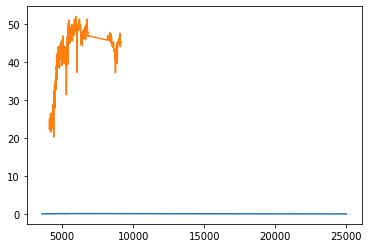

In [15]:
plt.plot(mspec[0], mspec[1])
plt.plot(fspec['col1'], fspec['col2'])

(5838.6, 6862)

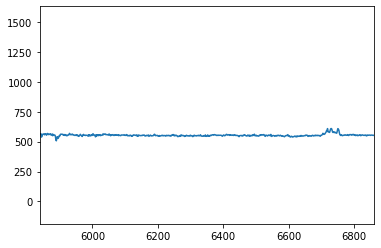

In [12]:
#plt.plot(alfvar.data.lam, alfvar.data.flx)
#plt.plot(alfvar.sspgrid.lam, t)
#plt.plot(alfvar.data.lam, mflx)
#plt.plot(alfvar.data.lam, alfvar.data.flx)
plt.plot(data.lam, data.flx/zmspec)
plt.xlim(5838.6,  6862)

In [10]:
data = alfvar.data

In [ ]:
mflx, tcoeff = contnormspec(alfvar.data.lam, alfvar.data.flx/zmspec, alfvar.data.err/zmspec,
                            tl1, tl2, coeff = True)

In [ ]:
mflx, tcoeff = contnormspec(alfvar.data.lam, alfvar.data.flx/zmspec, alfvar.data.err/zmspec, tl1, tl2, coeff = True)

In [10]:
for i in range(alfvar.nlint):
    print(i, alfvar.l1[i], alfvar.l2[i])
    print(max(alfvar.l1[i], alfvar.data.lam[0]))
    print(min(alfvar.l1[i], alfvar.data.lam[0]))

0 4000.0 4700.0
4000.0
1 4700.0 5699.999999999999
4700.0
2 5699.999999999999 6700.0
5699.999999999999
3 8000.0 8920.0
8000.0


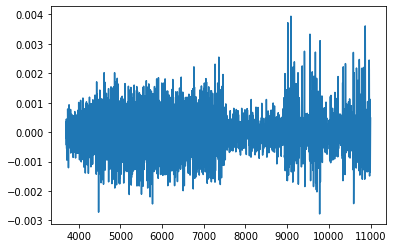

In [6]:
plt.plot(f1['col1'], f1['col2'] - f2['col2'])

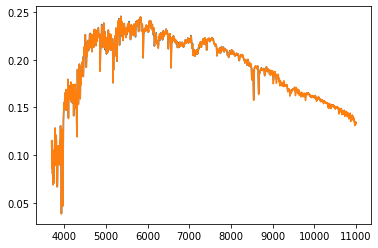

In [4]:
f1 = astro_ascii.read("{0}models/test1.dat".format(ALF_HOME))
f2 = astro_ascii.read("{0}models/test2.dat".format(ALF_HOME))
plt.plot(f1['col1'], f1['col2'])
plt.plot(f2['col1'], f2['col2'])
#plt.xlim(5e3, 6e3)

In [10]:
%timeit velbroad(f1['col1'], f1['col2'], 250)

421 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%timeit velbroad2(f1['col1'], f1['col2'], 250)

181 ms ± 3.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
s = velbroad(f1['col1'], f1['col2'], 250)
s2 = velbroad2(f1['col1'], f1['col2'], 250)

In [6]:
(s-s2).std()

0.0

(28, 50)

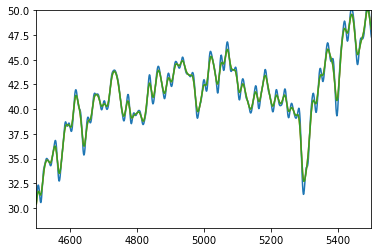

In [7]:
plt.plot(f1['col1'], f1['col2'])
plt.plot(f1['col1'], s)
plt.plot(f1['col1'], s2)
plt.xlim(4.5e3, 5.5e3)
plt.ylim(28, 50)

# speed

In [165]:
    f20_attrname = np.array(['solar','nap','nam','cap','cam','fep',
                          'fem','cp','cm','np','nm','ap','tip','tim',
                          'mgp','mgm','sip','sim','teffp','teffm','crp',
                          'mnp','bap','bam','nip','cop','eup','srp','kp','vp',
                          'cup','nap6','nap9'])
    f20_icollist = np.array([1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33 ,34])
    attrs = dict(zip(f20_icollist, f20_attrname))

In [170]:
def get_sspgrid2(alfvar):
    f20_read_dict_attr = np.array(['lam','solar','nap','nam','cap','cam','fep',
                          'fem','cp','cm','d1','np','nm','ap','tip','tim',
                          'mgp','mgm','sip','sim','teffp','teffm','crp',
                          'mnp','bap','bam','nip','cop','eup','srp','kp','vp',
                          'cup','nap6','nap9'])
    
    f20_attrname = np.array(['solar','nap','nam','cap','cam','fep',
                          'fem','cp','cm','np','nm','ap','tip','tim',
                          'mgp','mgm','sip','sim','teffp','teffm','crp',
                          'mnp','bap','bam','nip','cop','eup','srp','kp','vp',
                          'cup','nap6','nap9'])
    f20_icollist = np.array([1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33 ,34])
    
    charz  = np.array(['m1.5','m1.0','m0.5','p0.0','p0.2'])
    charz2  = np.array(['-1.50','-1.00','-0.50','+0.00','+0.25'])
    charm  = np.array(['0.08','0.10','0.15','0.20','0.25','0.30','0.35','0.40'])
    chart  = np.array(['t01.0','t03.0','t05.0','t07.0','t09.0','t11.0','t13.5'])
    chart2 = np.array(['t01','t03','t05','t09','t13'])
    nstart, nl = alfvar.nstart, alfvar.nl

    for k in range(alfvar.nzmet):
        for j in range(alfvar.nage_rfcn):
            try:
                f20 = np.loadtxt("{0}infiles/atlas_ssp_{1}_Z{2}.abund."\
                "{3}.s100".format(ALF_HOME, chart2[j], charz[k], alfvar.atlas_imf))
            except:
                print('SETUP ERROR: ATLAS models not found')
                print("{0}infiles/atlas_ssp_{1}_Z{2}.abund."\
                "{3}.s100".format(ALF_HOME, chart2[j], charz[k], alfvar.atlas_imf))

            alfvar.sspgrid.__setattr__('lam', f20[-nl:, 0])
            for iattr, icol in zip(f20_attrname, f20_icollist):
                getattr(alfvar.sspgrid, iattr)[:,j,k] = f20[-nl:, icol]
    return alfvar

In [178]:
from itertools import starmap
def get_sspgrid3(alfvar):
    f20_read_dict_attr = np.array(['lam','solar','nap','nam','cap','cam','fep',
                          'fem','cp','cm','d1','np','nm','ap','tip','tim',
                          'mgp','mgm','sip','sim','teffp','teffm','crp',
                          'mnp','bap','bam','nip','cop','eup','srp','kp','vp',
                          'cup','nap6','nap9'])
    
    f20_attrname = np.array(['solar','nap','nam','cap','cam','fep',
                          'fem','cp','cm','np','nm','ap','tip','tim',
                          'mgp','mgm','sip','sim','teffp','teffm','crp',
                          'mnp','bap','bam','nip','cop','eup','srp','kp','vp',
                          'cup','nap6','nap9'])
    f20_icollist = np.array([1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33 ,34])
    
    charz  = np.array(['m1.5','m1.0','m0.5','p0.0','p0.2'])
    charz2  = np.array(['-1.50','-1.00','-0.50','+0.00','+0.25'])
    charm  = np.array(['0.08','0.10','0.15','0.20','0.25','0.30','0.35','0.40'])
    chart  = np.array(['t01.0','t03.0','t05.0','t07.0','t09.0','t11.0','t13.5'])
    chart2 = np.array(['t01','t03','t05','t09','t13'])
    nstart, nl = alfvar.nstart, alfvar.nl

    for k in range(alfvar.nzmet):
        for j in range(alfvar.nage_rfcn):
            filename = "{0}infiles/atlas_ssp_{1}_Z{2}.abund."\
            "{3}.s100".format(ALF_HOME, chart2[j], charz[k], alfvar.atlas_imf)
            f20 = np.loadtxt(filename)

            alfvar.sspgrid.__setattr__('lam', f20[-nl:, 0])
            for iattr, icol in zip(f20_attrname, f20_icollist):
                getattr(alfvar.sspgrid, iattr)[:,j,k] = f20[-nl:, icol]
    return alfvar

In [173]:
    f20_attrname = np.array(['solar','nap','nam','cap','cam','fep',
                          'fem','cp','cm','np','nm','ap','tip','tim',
                          'mgp','mgm','sip','sim','teffp','teffm','crp',
                          'mnp','bap','bam','nip','cop','eup','srp','kp','vp',
                          'cup','nap6','nap9'])
    f20_icollist = np.array([1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33 ,34])
    j, k = 0, 0